IMPORTING IMPORTANT LIBRARIES

In [83]:
import pandas as pd
import numpy as np
import shap
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

## 📊 Dataset & Feature Importance – Debt Stress Radar™
Random fake data generated by Chatgpt

### 📁 Dataset Overview
- **Type:** Synthetic (self-generated)
- **Rows:** 10,000
- **Context:** Indian borrower financial profiles
- **Purpose:** Early detection of debt stress using explainable AI
- **Compliance:** No real customer data used

Each row represents an **independent virtual borrower**, generated using realistic income ranges and CA-approved financial thresholds.

---

### 🔢 Target Variable
**Column:** `debt_stress`

| Value | Meaning |
|------|--------|
| `0` | Not Debt Stressed (financially manageable) |
| `1` | Debt Stressed (high risk of debt trap) |

#### Labeling Logic
A borrower is marked as **Debt Stressed (1)** if **any** of the following conditions are true:
- EMI-to-Income Ratio > **45%**
- Credit Utilization > **60%**

```python
if emi_income_ratio > 0.45 or credit_utilization > 0.6:
    debt_stress = 1
else:
    debt_stress = 0


LOADING DATASET

In [ ]:
df=pd.read_csv('dataset_complex.csv')
df.head()

,monthly_income,fixed_expenses,total_emi,credit_card_outstanding,avg_interest_rate,active_loans,emi_income_ratio,expense_ratio,credit_utilization,interest_burden,loan_density,debt_stress_score
0,81615,28753.175550,21002.146834,319350.646980,22.945472,2,0.257332,0.352303,0.978223,0.229455,0.333333,82.322774
1,147342,64641.513102,8890.871863,311047.681594,37.408051,8,0.060342,0.438717,0.527765,0.374081,1.333333,93.940892
2,109004,46525.527595,53228.263724,293141.088210,31.291105,8,0.488315,0.426824,0.672317,0.312911,1.333333,100.000000
3,150160,78120.291451,100244.439758,138329.121255,26.197147,5,0.667584,0.520247,0.230303,0.261971,0.833333,100.000000
4,51214,15872.562998,19984.633739,153725.962096,30.415463,1,0.390218,0.309926,0.750410,0.304155,0.166667,81.971445


DATA PREPROCESSING AND EDA

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   monthly_income           12000 non-null  int64  
 1   fixed_expenses           12000 non-null  float64
 2   total_emi                12000 non-null  float64
 3   credit_card_outstanding  12000 non-null  float64
 4   avg_interest_rate        12000 non-null  float64
 5   active_loans             12000 non-null  int64  
 6   emi_income_ratio         12000 non-null  float64
 7   expense_ratio            12000 non-null  float64
 8   credit_utilization       12000 non-null  float64
 9   interest_burden          12000 non-null  float64
 10  loan_density             12000 non-null  float64
 11  debt_stress_score        12000 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.1 MB


In [41]:
df.describe()

,monthly_income,fixed_expenses,total_emi,credit_card_outstanding,avg_interest_rate,active_loans,emi_income_ratio,expense_ratio,credit_utilization,interest_burden,loan_density,debt_stress_score
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,135573.837917,64417.804326,50661.313433,271996.512260,24.347053,4.503917,0.373426,0.476296,0.502774,0.243471,0.750653,84.634524
std,66347.966869,37072.694691,37586.217267,219248.588746,10.109691,2.298063,0.187522,0.130259,0.289312,0.101097,0.383010,13.957613
min,20004.000000,5331.801651,1153.293124,23.972946,7.001852,1.000000,0.050002,0.250020,0.000084,0.070019,0.166667,25.858064
25%,78222.500000,34214.960438,19688.610710,93179.139162,15.470626,3.000000,0.209557,0.362465,0.252053,0.154706,0.500000,75.523234
50%,136566.000000,59002.893777,41016.945152,215136.627405,24.236353,4.000000,0.373272,0.476833,0.504942,0.242364,0.666667,86.737861
75%,192952.750000,88972.350681,74464.158222,405456.428212,33.172959,7.000000,0.537171,0.589609,0.753424,0.331730,1.166667,98.172647
max,249989.000000,173893.713937,172557.666912,994109.198783,41.998262,8.000000,0.699905,0.699997,0.999997,0.419983,1.333333,100.000000


In [42]:
df.isna().sum()

monthly_income             0
fixed_expenses             0
total_emi                  0
credit_card_outstanding    0
avg_interest_rate          0
active_loans               0
emi_income_ratio           0
expense_ratio              0
credit_utilization         0
interest_burden            0
loan_density               0
debt_stress_score          0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

Spliting data into dependent(target variable) and independent data

In [45]:
X = df.drop('debt_stress_score', axis=1)
y = df['debt_stress_score']

train-test spliting of data

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
len(x_train), len(x_test)

(9600, 2400)

In [48]:
x_train.head()

,monthly_income,fixed_expenses,total_emi,credit_card_outstanding,avg_interest_rate,active_loans,emi_income_ratio,expense_ratio,credit_utilization,interest_burden,loan_density
9182,109217,57331.708569,41233.331262,403261.331814,21.026392,1,0.377536,0.524934,0.923074,0.210264,0.166667
11091,166224,107138.122407,46718.769265,3907.714331,20.782644,7,0.281059,0.644541,0.005877,0.207826,1.166667
6428,128913,50508.662958,74531.678425,440366.128165,25.592702,1,0.578155,0.391804,0.853999,0.255927,0.166667
288,85689,45084.900657,58223.339033,34424.200561,13.737562,1,0.679473,0.526146,0.100434,0.137376,0.166667
2626,162692,61334.835377,13404.870094,350046.611429,24.939171,7,0.082394,0.377000,0.537898,0.249392,1.166667


In [49]:
x_test.head()

,monthly_income,fixed_expenses,total_emi,credit_card_outstanding,avg_interest_rate,active_loans,emi_income_ratio,expense_ratio,credit_utilization,interest_burden,loan_density
1935,101029,39837.267682,58488.802145,289383.229200,20.657075,6,0.578931,0.394315,0.716090,0.206571,1.000000
6494,125707,68071.274818,68053.406434,201418.393546,32.310680,8,0.541365,0.541507,0.400571,0.323107,1.333333
1720,232429,148298.437900,89691.488213,644129.443567,17.175780,7,0.385888,0.638038,0.692824,0.171758,1.166667
9120,65510,36099.066561,31644.284281,81986.461520,19.857199,5,0.483045,0.551047,0.312878,0.198572,0.833333
360,90275,50446.983682,34336.586162,56556.775335,14.196481,7,0.380355,0.558815,0.156624,0.141965,1.166667


In [50]:
y_train.head()

9182     88.315699
11091    73.424150
6428     97.862186
288      67.934702
2626     80.686697
Name: debt_stress_score, dtype: float64

In [51]:
y_test.head()

1935    100.000000
6494    100.000000
1720     97.059082
9120     96.699876
360      85.000698
Name: debt_stress_score, dtype: float64

MODEL TRAINING USING RANDOM FOREST REGRESSION

In [74]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42
)
model.fit(x_train, y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=200,
                      random_state=42)

In [75]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [76]:
y_train.head()

9182     88.315699
11091    73.424150
6428     97.862186
288      67.934702
2626     80.686697
Name: debt_stress_score, dtype: float64

In [77]:
y_test.head()

1935    100.000000
6494    100.000000
1720     97.059082
9120     96.699876
360      85.000698
Name: debt_stress_score, dtype: float64

MODEL EVALUATION

In [78]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2  = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 17.67
Mean Absolute Error: 3.11
R² Score: 0.906


In [79]:
train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_test, y_test)

print(train_r2, test_r2)

0.9332124181724416 0.905859807101269


“Why is the model giving this score?”  
here SHAP will show basically which top 5 features influencing the debt stress score predictions are?

 98%|===================| 2363/2400 [00:36<00:00]        

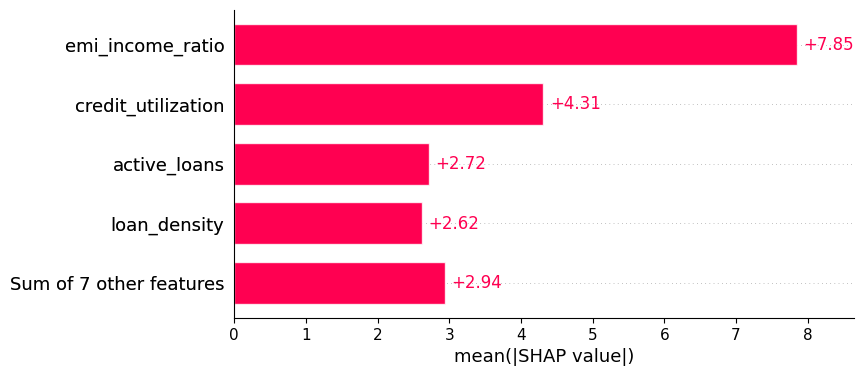

In [ ]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

shap.plots.bar(shap_values, max_display=5)

The SHAP analysis shows that EMI-to-income ratio is the strongest driver of debt stress, followed by credit utilization and the number of active loans. This aligns closely with how CAs assess borrower risk, which makes the model explainable and trustworthy

Model dumping for streamlit dashboard

In [84]:
joblib.dump(model, "debt_stress_radar_model.pkl")

['debt_stress_radar_model.pkl']

In [85]:
joblib.dump(explainer, "shap_explainer.pkl")

['shap_explainer.pkl']

In [86]:
model.feature_names_in_

array(['monthly_income', 'fixed_expenses', 'total_emi',
       'credit_card_outstanding', 'avg_interest_rate', 'active_loans',
       'emi_income_ratio', 'expense_ratio', 'credit_utilization',
       'interest_burden', 'loan_density'], dtype=object)